In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('C:/Users/Mehmet Ersolak/Documents/GitHub/Data_Science_Project/Customer Satisfaction/Data_Set/3-customersatisfaction.csv')
df

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365
...,...,...,...
95,95,2.055072,8.686851
96,96,0.864149,2.901486
97,97,-1.586101,0.786207
98,98,1.558528,5.447475


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Satisfaction,100.0,-0.005427,1.721792,-2.992863,-1.431357,0.109167,1.421119,2.986736
Incentive,100.0,3.445220,2.911818,-1.068081,1.471341,2.748839,4.739113,11.000056


In [5]:
df.corr(numeric_only=True)

,Customer Satisfaction,Incentive
Customer Satisfaction,1.000000,0.813932
Incentive,0.813932,1.000000


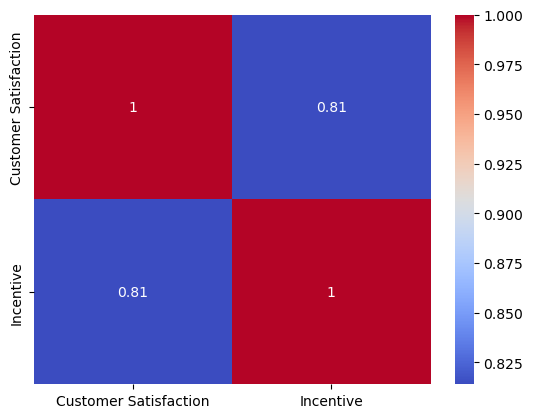

In [6]:
sns.heatmap(df.corr(numeric_only=True), cmap = 'coolwarm', annot= True)
plt.show()

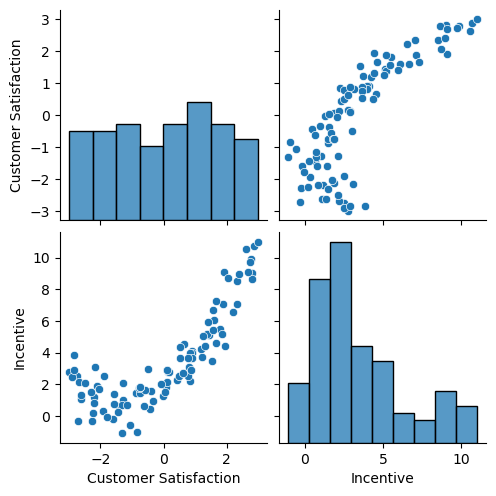

In [7]:
sns.pairplot(data = df)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [10]:
#indepented & dependet features
X = df[['Customer Satisfaction']]
y = df[['Incentive']]

In [12]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)
X_train

,Customer Satisfaction
99,0.512504
3,2.625838
20,-0.865714
55,-1.145369
6,2.823460
...,...
28,1.191020
0,-1.282447
5,-1.311432
12,0.490521


In [16]:
# Standart Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('X_train \n', X_train, '\n')
print('X_test \n', X_test)

X_train 
 [[ 0.24763353]
 [ 1.45565669]
 [-0.54018267]
 [-0.7000392 ]
 [ 1.56862116]
 [ 0.98756838]
 [ 0.44864075]
 [ 1.54377517]
 [ 1.33219938]
 [-0.48041093]
 [ 0.39289296]
 [-0.65745669]
 [ 0.44266377]
 [-0.8721316 ]
 [-1.57257044]
 [-0.47018463]
 [-0.08360835]
 [-1.67090265]
 [-1.47554396]
 [-0.26670725]
 [-1.29927482]
 [ 0.02523769]
 [ 0.84556122]
 [-0.3215997 ]
 [ 0.0501141 ]
 [ 0.86053533]
 [-1.15064015]
 [-0.52347038]
 [-0.9488333 ]
 [ 0.46442017]
 [-0.46600711]
 [ 0.30711082]
 [-1.21262526]
 [ 1.07108903]
 [ 1.29604171]
 [-0.86064358]
 [ 0.67782396]
 [ 1.1293955 ]
 [-0.48194058]
 [ 0.90856014]
 [ 0.01384089]
 [ 0.87374067]
 [ 0.71021884]
 [-1.12668733]
 [-1.34723756]
 [ 1.66195332]
 [ 1.22326947]
 [-1.67527517]
 [-0.47488486]
 [ 0.46534906]
 [ 1.01978206]
 [ 0.19778473]
 [-0.37249752]
 [ 0.0203158 ]
 [ 1.51810861]
 [ 0.74714102]
 [ 0.76156659]
 [-0.40736439]
 [ 1.2890125 ]
 [ 1.03372149]
 [-0.23688937]
 [-1.75610302]
 [-1.07135211]
 [-0.96153699]
 [ 1.55231709]
 [ 0.90446104]


In [17]:
# Regresion
regression = LinearRegression()
regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:
# prediction
y_pred = regression.predict(X_test)

In [19]:
score = r2_score(y_test, y_pred)
score

0.2705652535622244

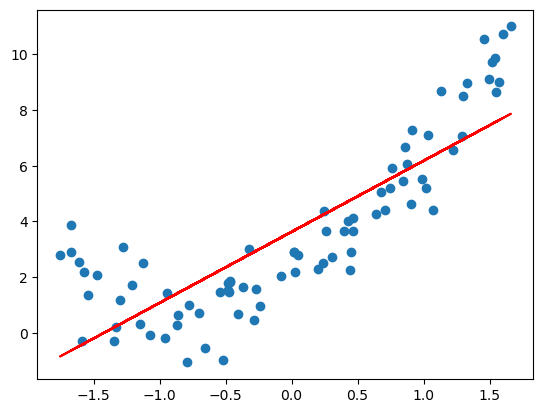

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), 'red')
plt.show()

In [36]:
# PolynominalFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)

In [37]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_train_poly

array([[ 1.00000000e+00,  2.47633535e-01,  6.13223675e-02],
       [ 1.00000000e+00,  1.45565669e+00,  2.11893639e+00],
       [ 1.00000000e+00, -5.40182671e-01,  2.91797318e-01],
       [ 1.00000000e+00, -7.00039198e-01,  4.90054879e-01],
       [ 1.00000000e+00,  1.56862116e+00,  2.46057233e+00],
       [ 1.00000000e+00,  9.87568378e-01,  9.75291302e-01],
       [ 1.00000000e+00,  4.48640749e-01,  2.01278522e-01],
       [ 1.00000000e+00,  1.54377517e+00,  2.38324178e+00],
       [ 1.00000000e+00,  1.33219938e+00,  1.77475518e+00],
       [ 1.00000000e+00, -4.80410926e-01,  2.30794658e-01],
       [ 1.00000000e+00,  3.92892957e-01,  1.54364876e-01],
       [ 1.00000000e+00, -6.57456685e-01,  4.32249293e-01],
       [ 1.00000000e+00,  4.42663768e-01,  1.95951211e-01],
       [ 1.00000000e+00, -8.72131603e-01,  7.60613533e-01],
       [ 1.00000000e+00, -1.57257044e+00,  2.47297780e+00],
       [ 1.00000000e+00, -4.70184630e-01,  2.21073587e-01],
       [ 1.00000000e+00, -8.36083500e-02

In [38]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [39]:
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.7685687698788557


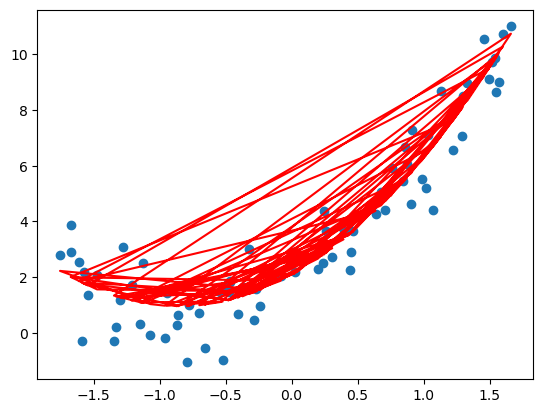

In [44]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train_poly), 'red')
plt.show()

In [49]:
new_df = pd.read_csv('C:/Users/Mehmet Ersolak/Documents/GitHub/Data_Science_Project/Customer Satisfaction/Data_Set/3-newdatas.csv')
new_df

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [52]:
new_df.rename(columns={'0' : 'Customer Satisfaction'}, inplace=True)
new_df

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [53]:
X_new = new_df[['Customer Satisfaction']]
X_new

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [54]:
X_new = scaler.fit_transform(X_new)

In [55]:
X_new_poly = poly.transform(X_new)

In [56]:
y_new_pred = regression.predict(X_new_poly)

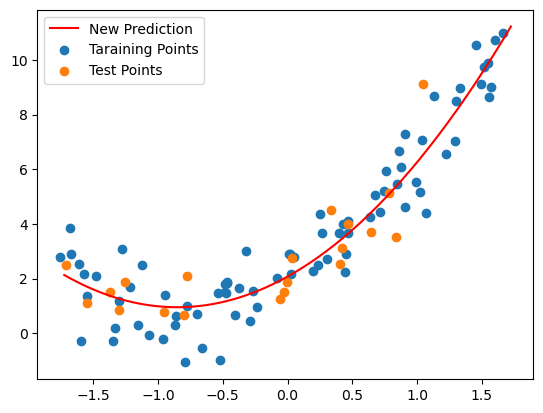

In [58]:
plt.plot(X_new, y_new_pred, 'r', label = 'New Prediction')
plt.scatter(X_train, y_train, label = 'Taraining Points')
plt.scatter(X_test, y_test, label = 'Test Points')
plt.legend()
plt.show()

In [63]:
def poly_regression(degree):
    poly_features = PolynomialFeatures(degree = degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipline = Pipeline([
        ('Standart Scaler', scaler),
        ('poly_features', poly_features),
        ('lin_reg', lin_reg)
    ])
    pipline.fit(X_train, y_train)
    score = pipline.score(X_test, y_test)
    print('R2 Score: ', score)

    y_pred_new = pipline.predict(X_new)
    plt.plot(X_new, y_pred_new, 'r', label = 'New Prediction')
    plt.scatter(X_train, y_train, label = 'Taraining Points')
    plt.scatter(X_test, y_test, label = 'Test Points')
    plt.legend()
    plt.show()

R2 Score:  0.2705652535622246


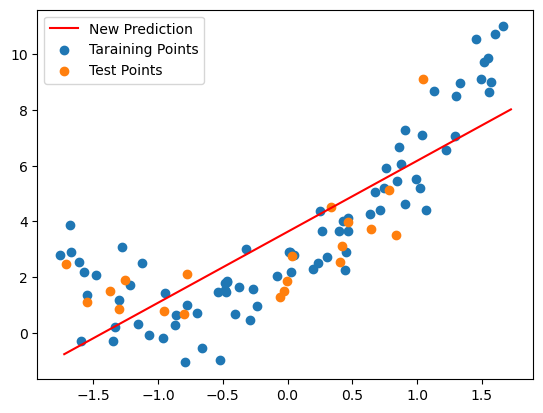

R2 Score:  0.7685687698788557


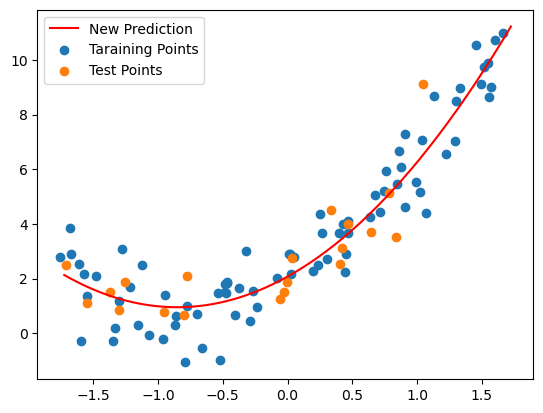

R2 Score:  0.7573443621401049


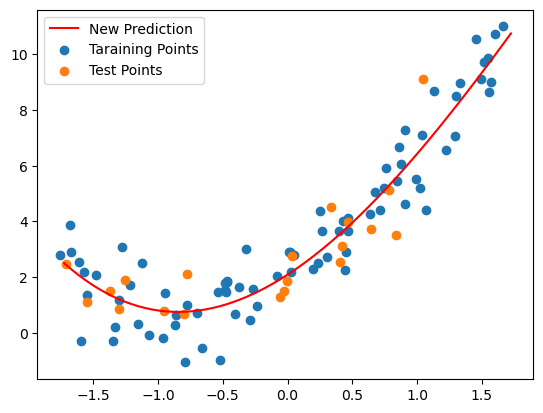

R2 Score:  0.7355034443260415


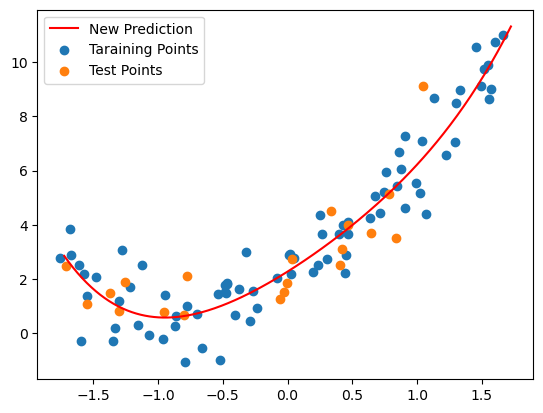

R2 Score:  0.7351244165095395


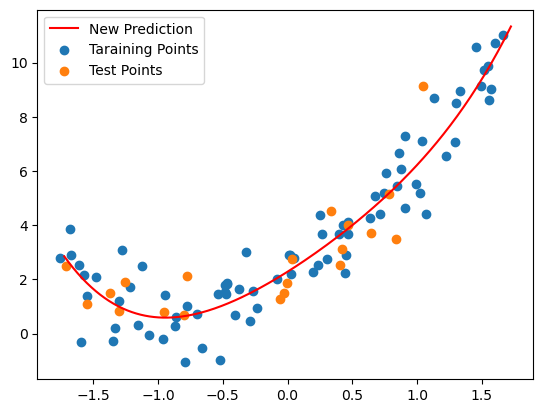

R2 Score:  0.7343590482133431


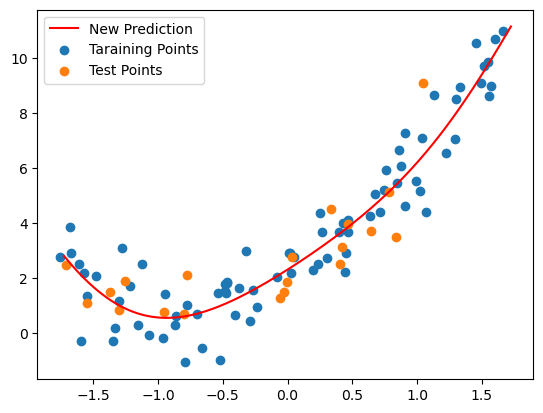

R2 Score:  0.7347819263549454


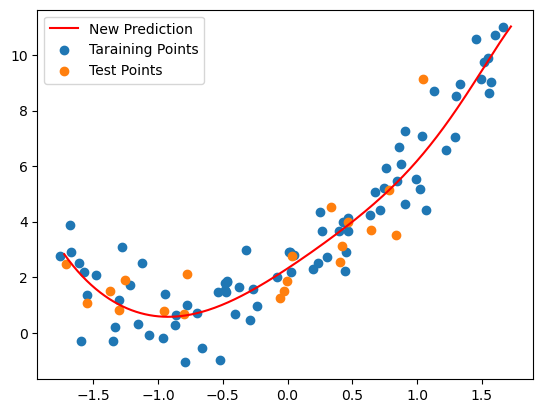

R2 Score:  0.7411422099998384


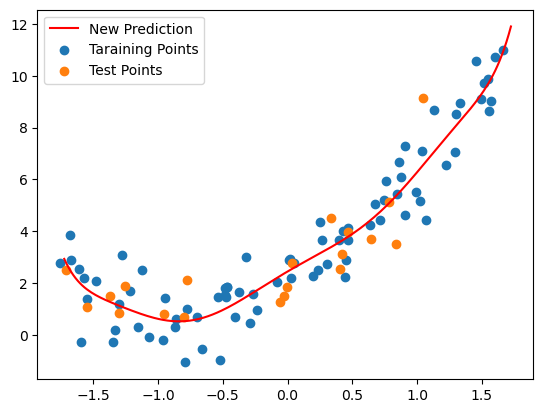

R2 Score:  0.7310763879815951


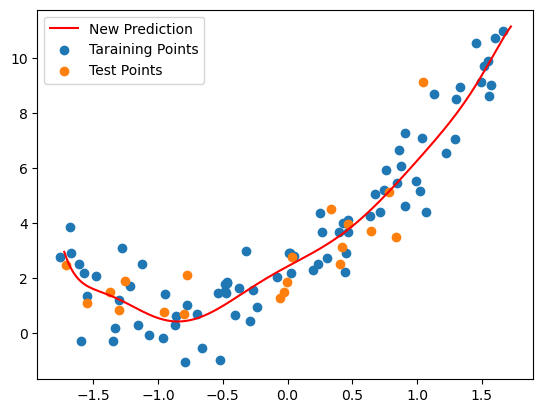

R2 Score:  0.7280578621232878


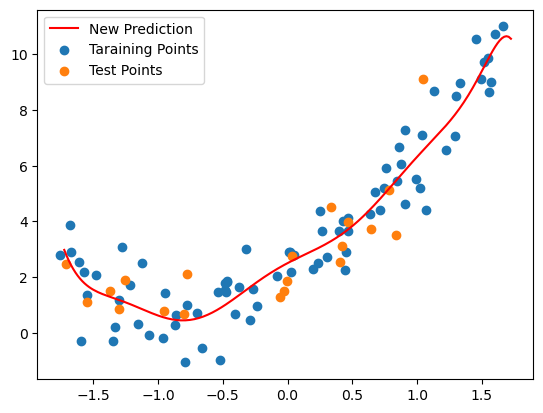

In [64]:
for degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    poly_regression(degree)